<a href="https://colab.research.google.com/github/VeereshElango/tsne-visualizations/blob/master/t-SNE%20visualization%20of%2020%20News%20group%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import re
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

## Importing Dataset

In [2]:
dataset = fetch_20newsgroups()

In [3]:
print("Dataset Structure", dataset.keys())

Dataset Structure dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [13]:
df = pd.DataFrame()
df["data"] = dataset["data"]
df["target"] = dataset["target"]
df["target_names"] = df.target.apply(lambda row: dataset["target_names"][row])
df.head()

,data,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


## Text Cleaning

In [5]:
from textblob import Word
from nltk.corpus import stopwords
import nltk

In [6]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
def clean_text(text):
    return " ".join([ Word(word).lemmatize() for word in re.sub("[^A-Za-z0-9]+", " ", text).lower().split() if word not in stopword])    

In [8]:
stopword = stopwords.words('english')

In [9]:
df["data_str"] = df.data.apply(lambda row: clean_text(row) )

## Tf-Idf Vectorization & t-SNE Dimensionality Reduction

In [12]:
perp_components = defaultdict(dict)
for i in [10,30,50,100]:
    for ngram in [(1,1),(1,2),(1,3),(2,2),(3,3)]:
        vectorizer = TfidfVectorizer(ngram_range=ngram, max_features= 2**10)
        text_to_vector = vectorizer.fit_transform(df.data_str.values)
        print("Ngram ",ngram )
        print("Perplexity ", i)
        X_embedded = TSNE(init="random",perplexity=i ).fit_transform(text_to_vector)
        ngram_str = str(ngram[0])+"_"+str(ngram[1])
        perp_components[i][ngram_str] = X_embedded
        # sns settings
        sns.set(rc={'figure.figsize':(15,15)})
        # colors
        palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))        
        y = df.target_names.values.tolist()
        # plot
        sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
        title = "t-SNE- 20News group - TfIdf - "+ngram_str+"- tSNE perplexity - "+str(i)
        plt.savefig(title)
        plt.title(title)
        plt.show()


Ngram  (1, 1)
Perplexity  10


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 3 keyword-only arguments) were given

In [ ]:
df_collection = [df]
for perplexity, values in perp_components.items():
    for ngram_str, value in values.items():
        df_collection.append(pd.DataFrame(value, columns=[str(perplexity)+"_"+ngram_str+"_comp1",str(perplexity)+"_"+ngram_str+"_comp2"]))
comb_df = pd.concat(df_collection, axis=1)
comb_df.head()

,data,target,target_names,data_str,10_1_1_comp1,10_1_1_comp2,10_1_2_comp1,10_1_2_comp2,10_1_3_comp1,10_1_3_comp2,10_2_2_comp1,10_2_2_comp2,10_3_3_comp1,10_3_3_comp2,30_1_1_comp1,30_1_1_comp2,30_1_2_comp1,30_1_2_comp2,30_1_3_comp1,30_1_3_comp2,30_2_2_comp1,30_2_2_comp2,30_3_3_comp1,30_3_3_comp2,50_1_1_comp1,50_1_1_comp2,50_1_2_comp1,50_1_2_comp2,50_1_3_comp1,50_1_3_comp2,50_2_2_comp1,50_2_2_comp2,50_3_3_comp1,50_3_3_comp2,100_1_1_comp1,100_1_1_comp2,100_1_2_comp1,100_1_2_comp2,100_1_3_comp1,100_1_3_comp2,100_2_2_comp1,100_2_2_comp2,100_3_3_comp1,100_3_3_comp2
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,lerxst wam umd edu thing subject car nntp post...,14.158424,8.116646,22.690584,1.657213,15.317171,2.238166,43.638939,-42.361416,42.516148,80.920097,-15.735690,-26.784634,-34.831757,29.740667,-23.375977,1.685964,-59.169712,13.739062,14.492247,-70.917282,2.893066,-35.959515,-7.657080,18.837610,11.953969,-9.656553,-32.623642,-50.399456,60.315693,-7.023430,0.240298,-10.848470,-9.529406,-0.755302,-10.351879,-8.406889,-28.692865,-42.630329,-26.903791,-42.821270
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuo carson u washington edu guy kuo subject...,-26.237953,-25.959316,-9.305567,8.639215,-15.343851,14.669648,-57.404335,-55.862457,-41.271812,28.448484,20.445980,-51.685989,2.499035,-26.809759,-12.732861,25.501289,45.502281,42.765743,35.363480,-22.074621,37.505692,-27.312496,7.823986,-3.534279,-3.920805,11.649383,42.484730,41.660679,-11.636613,48.774059,-16.285355,8.598038,8.678700,2.140788,5.538671,-20.519650,-35.193005,-7.299483,-17.145645,25.659464
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillis ec ecn purdue edu thomas e willis subj...,-27.888649,-58.788830,-64.309273,6.920125,-61.904465,3.225245,31.229080,77.916069,-14.821551,-96.602264,55.832851,9.414701,-17.860964,-56.883125,33.528362,52.904991,-12.000376,40.524357,66.002266,-67.960793,58.822430,-0.814868,53.678753,18.342726,-13.007231,47.597725,-22.635975,64.735039,59.585560,56.851795,-25.258522,26.413351,15.792874,32.809643,23.342566,3.881945,50.610882,-0.134521,-16.186413,39.459995
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,jgreen amber joe green subject weitek p9000 or...,62.395245,-31.535728,-17.255156,-31.119604,-32.646229,-51.844311,120.717384,22.527817,-14.637097,38.201000,43.472733,55.555595,27.033003,-61.386475,7.281408,25.365280,23.370106,-87.306000,-51.019886,7.129111,41.119194,13.741321,31.081648,-29.448290,-24.624880,22.629030,-54.239193,30.105356,12.813024,23.227528,21.877041,28.551737,47.759327,4.058839,22.355042,-11.943737,-14.074631,4.519509,46.006523,-20.975979
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcm head cfa harvard edu jonathan mcdowell sub...,-36.315075,-29.094547,-35.623268,43.699406,-40.237061,-9.721295,46.102009,85.752495,-49.877747,-39.978539,12.164458,-38.527924,-50.982677,2.004004,55.227634,-21.324015,-12.814418,-75.271912,-62.023575,62.119465,28.930891,3.830289,9.788504,-29.899107,23.697557,27.592821,27.426731,44.344547,77.253456,-33.014141,-42.241245,-0.562860,36.394363,-16.381857,11.907329,18.106075,19.598429,-47.554077,46.722919,47.367161


In [ ]:
target_name_dict = {}
for target_name in comb_df.target_names.unique():
  tn_df = comb_df[comb_df.target_names == target_name]
  features_dict ={}
  for col in tn_df.columns:
    features_dict[col] = tn_df[col].values.tolist()
  target_name_dict[target_name] = features_dict


In [ ]:
import json

In [ ]:
json_data = json.dumps(target_name_dict)
with open("20_news_group_tsne_visualization.json", "w") as f:
  f.write(json_data)

## PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

Ngram  (1, 1)


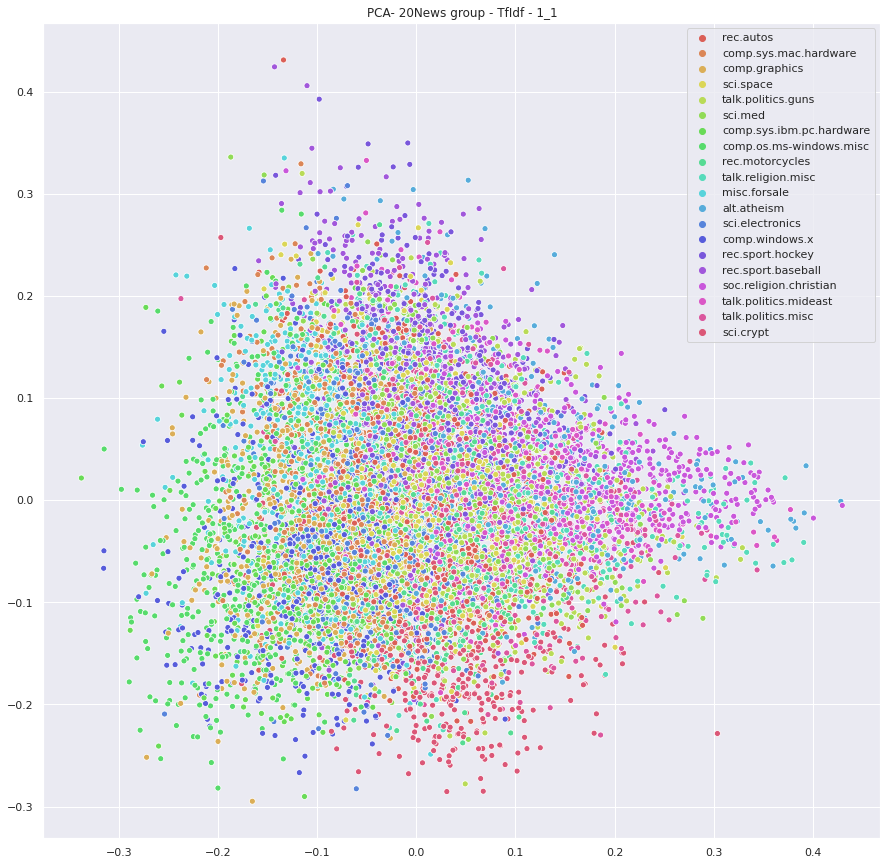

Ngram  (1, 2)


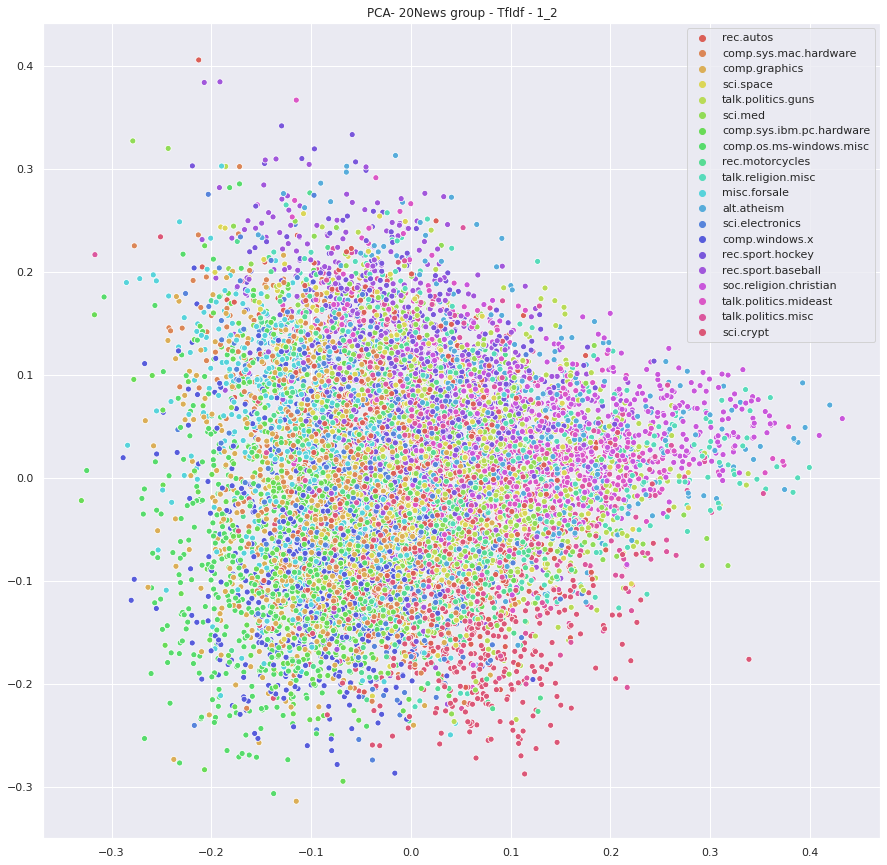

Ngram  (1, 3)


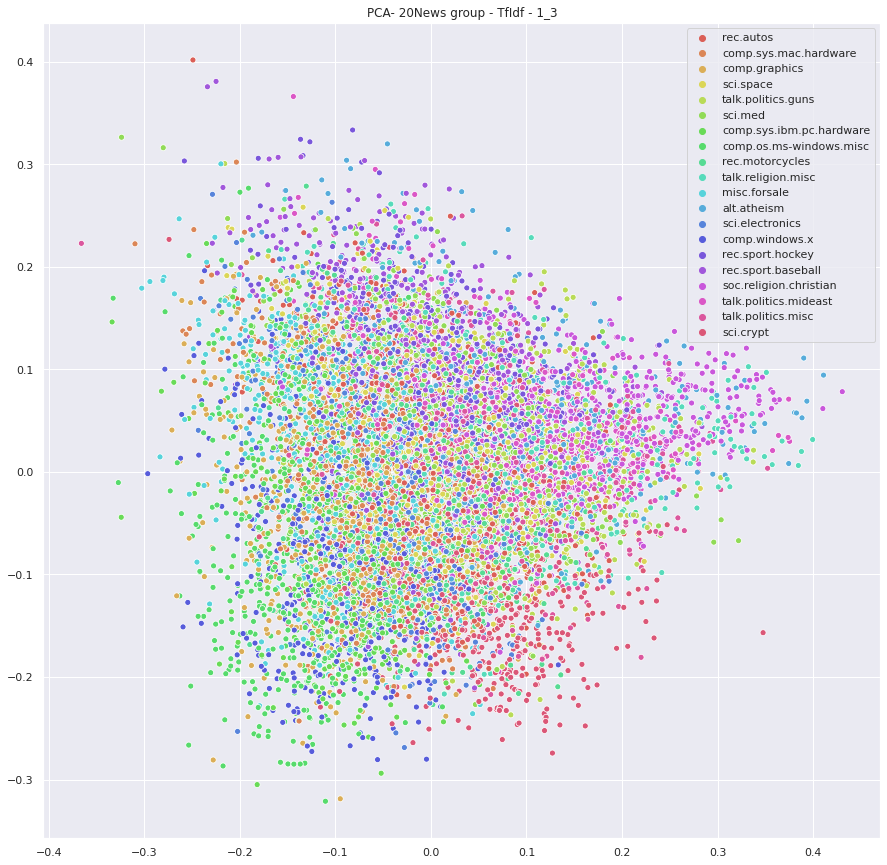

Ngram  (2, 2)


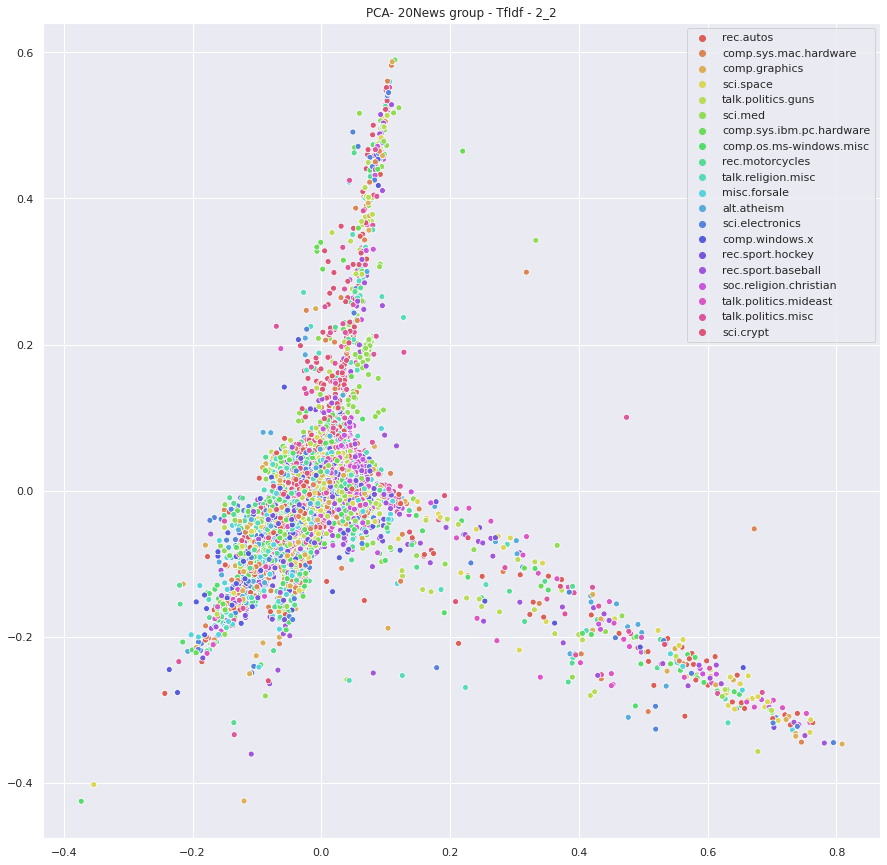

Ngram  (3, 3)


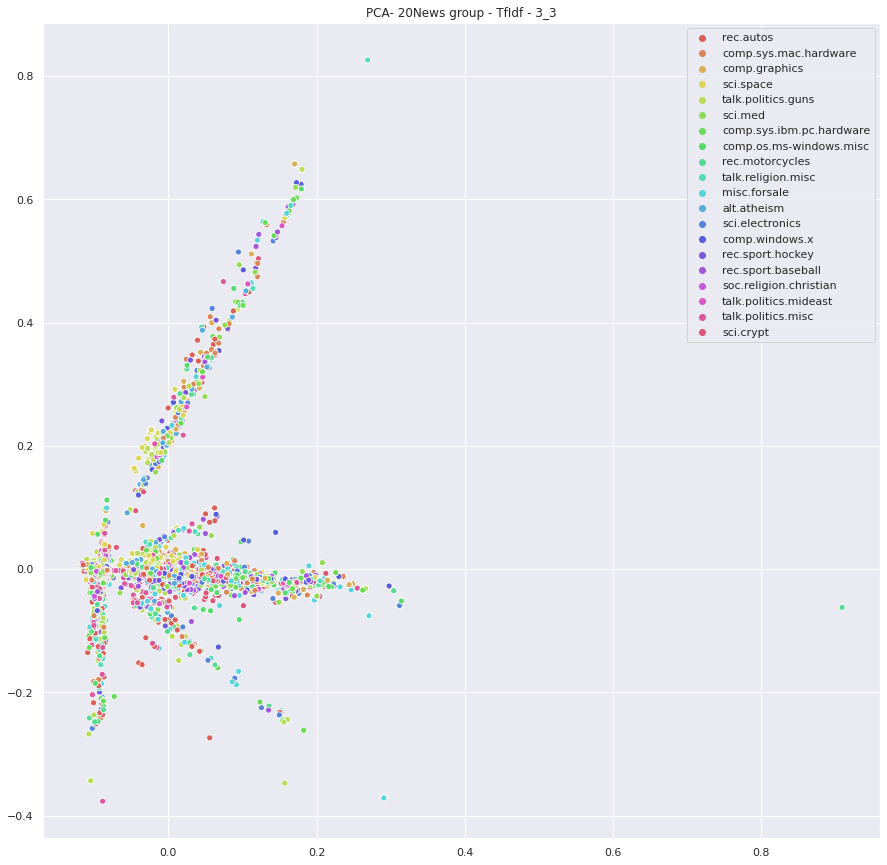

In [ ]:
perp_components = defaultdict(dict)

for ngram in [(1,1),(1,2),(1,3),(2,2),(3,3)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram, max_features= 2**10)
    text_to_vector = vectorizer.fit_transform(df.data_str.values)
    print("Ngram ",ngram )    
    X_embedded = PCA(n_components=2).fit_transform(text_to_vector.toarray())
    ngram_str = str(ngram[0])+"_"+str(ngram[1])
    perp_components[ngram_str] = X_embedded
    # sns settings
    sns.set(rc={'figure.figsize':(15,15)})
    # colors
    palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))        
    y = df.target_names.values.tolist()
    # plot
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
    title = "PCA- 20News group - TfIdf - "+ngram_str
    plt.savefig(title)
    plt.title(title)
    plt.show()